# Modeling Exercises

-  Select a dataset with a continuous target variable.

- Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

- Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

## Prepare Data for Modeling

**Wrangle**

1. Acquire data from zillow database. 

2. Split data 

3. Scale data

In [1]:
import pandas as pd
import numpy as np
import wrangle
import acquire
import matplotlib.pyplot as plt

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

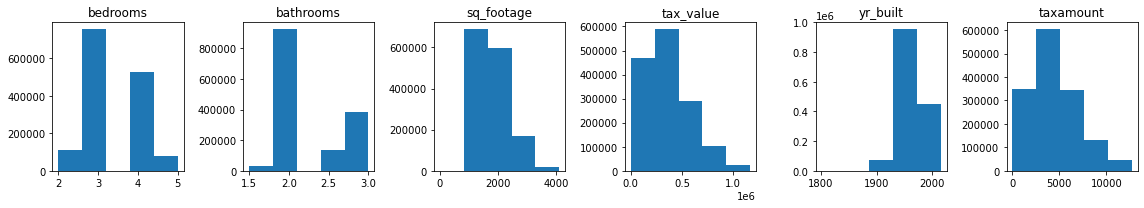

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df.head()

,bedrooms,bathrooms,sq_footage,tax_value,yr_built,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0
23,3.0,2.5,1821.0,537949.0,2013.0,6173.72,6059.0


In [4]:
df.shape

(1475147, 7)

In [5]:
train, validate, test = wrangle.split_data(df)
train.shape, validate.shape, test.shape

((826081, 7), (354036, 7), (295030, 7))

In [6]:
X_train = train.drop(columns='tax_value') 
X_validate = validate.drop(columns='tax_value')
X_test = test.drop(columns='tax_value')

y_train = train.tax_value
y_validate = validate.tax_value
y_test = test.tax_value

In [7]:
X_train.shape, X_validate.shape, X_test.shape, y_train.shape, y_validate.shape, y_test.shape

((826081, 6), (354036, 6), (295030, 6), (826081,), (354036,), (295030,))

In [8]:
X_validate

,bedrooms,bathrooms,sq_footage,yr_built,taxamount,fips
1714095,4.0,3.0,2078.0,1982.0,4251.61,6037.0
1423003,3.0,3.0,1764.0,1998.0,3751.80,6037.0
1276735,3.0,2.0,1455.0,1955.0,1965.37,6037.0
819207,4.0,2.0,1722.0,1973.0,3133.54,6037.0
1373888,3.0,2.0,1473.0,1949.0,3651.35,6037.0
...,...,...,...,...,...,...
1611677,2.0,2.0,1330.0,1949.0,2062.39,6037.0
1280963,4.0,3.0,2397.0,2003.0,8361.94,6037.0
648216,4.0,3.0,3095.0,1999.0,9651.13,6037.0
492661,4.0,2.0,1919.0,1966.0,6777.42,6059.0


In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validate = scaler.transform(X_validate)
X_test = scaler.transform(X_test)

In [10]:
X_train = pd.DataFrame(X_train, columns = ['bedrooms','bathrooms','sq_footage','yr_built','taxamount','fips'])
X_validate = pd.DataFrame(X_validate, columns = ['bedrooms','bathrooms','sq_footage','yr_built','taxamount','fips'])
X_test = pd.DataFrame(X_test, columns = ['bedrooms','bathrooms','sq_footage','yr_built','taxamount','fips'])

In [11]:
X_train.head()

,bedrooms,bathrooms,sq_footage,yr_built,taxamount,fips
0,-0.559143,-0.661833,-0.296500,-0.120649,0.141971,0.416549
1,-0.559143,-0.661833,-0.917147,-0.384196,-0.042563,0.416549
2,-0.559143,1.569854,-0.520831,1.355214,-0.473509,-0.611080
3,-0.559143,-0.661833,-0.199291,-0.120649,1.402232,-0.611080
4,-0.559143,-0.661833,-1.328420,0.406445,-0.477579,0.416549


In [12]:
# check the head of our X:
X_train.head()

,bedrooms,bathrooms,sq_footage,yr_built,taxamount,fips
0,-0.559143,-0.661833,-0.296500,-0.120649,0.141971,0.416549
1,-0.559143,-0.661833,-0.917147,-0.384196,-0.042563,0.416549
2,-0.559143,1.569854,-0.520831,1.355214,-0.473509,-0.611080
3,-0.559143,-0.661833,-0.199291,-0.120649,1.402232,-0.611080
4,-0.559143,-0.661833,-1.328420,0.406445,-0.477579,0.416549


**Target Variable/y**

This helps us determine which type of algorithm we may want to use. 

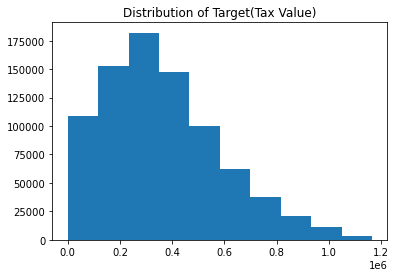

In [13]:
# how do we determine distribution?
plt.hist(y_train)
plt.title('Distribution of Target(Tax Value)')
plt.show()

In [14]:
len(y_train)

826081

## Modeling

### Baseline

About the initial baseline: 

> Before we begin making models, we need to know how well we can estimate (predict) the final price (tax_value) without using any features. This is often done by predicting every observation's target value to be the mean or the median. E.g. we could predict every price to be the mean price of all the properties in our training sample. We will try both the mean and the median, see which performs best, and set that evaluation metric value as our baseline performance to beat. 


1. Predict all prices to be $363,845.89, which is equal to the mean of tax_value for the training sample. Store in `y_train['price_pred_mean']`. 

2. Predict all final grades to be $328,010.00, which is equal to the median of tax_value  for the training sample. Store in `y_train['price_pred_median']`.  

3. Compute the RMSE comparing actual final price (tax_value) to price_pred_mean. 

4. Compute the RMSE comparing actual final grade (tax_value) to price_pred_median. 

In [15]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_train.head()

,tax_value
278237,405574.0
245132,366057.0
1369940,177000.0
1533627,681822.0
181419,251452.0


In [16]:
y_validate.head()

,tax_value
1714095,309642.0
1423003,290275.0
1276735,113444.0
819207,257353.0
1373888,265951.0


In [17]:
# 1. Predict price_pred_mean
price_pred_mean = y_train.tax_value.mean()
y_train['price_pred_mean'] = price_pred_mean
y_validate['price_pred_mean'] = price_pred_mean

In [18]:
round(price_pred_mean,2)

363845.89

In [19]:
# 2. compute price_pred_median
price_pred_median = y_train.tax_value.median()
y_train['price_pred_median'] = price_pred_median
y_validate['price_pred_median'] = price_pred_median

round(price_pred_median,2)

328010.0

In [20]:
# 3. RMSE of price_pred_mean
rmse_train = mean_squared_error(y_train.tax_value,
                                y_train.price_pred_mean) ** .5
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.price_pred_mean) ** (1/2)

In [21]:
rmse_train_2 = mean_squared_error(y_train.tax_value,
                                y_train.price_pred_mean, squared = False)
rmse_validate_2 = mean_squared_error(y_validate.tax_value, y_validate.price_pred_mean, squared = False)

In [22]:
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  220060.48 
Validate/Out-of-Sample:  220140.91


In [23]:
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train_2, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate_2, 2))

RMSE using Mean
Train/In-Sample:  220060.48 
Validate/Out-of-Sample:  220140.91


In [24]:
# 4. RMSE of price_pred_median
rmse_train = mean_squared_error(y_train.tax_value, y_train.price_pred_median) ** .5
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.price_pred_median) ** .5
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Median
Train/In-Sample:  222959.25 
Validate/Out-of-Sample:  222994.1



#### Addendum/Note:
we will incrementally build 
a dataframe for comparison of 
our metrics for model selection
for ease of reflection


In [25]:
from sklearn.metrics import explained_variance_score

In [26]:
def make_metric_df(y, y_pred, model_name, metric_df):
    if metric_df.size ==0:
        metric_df = pd.DataFrame(data=[
            {
                'model': model_name, 
                'RMSE_validate': mean_squared_error(
                    y,
                    y_pred) ** .5,
                'r^2_validate': explained_variance_score(
                    y,
                    y_pred)
            }])
        return metric_df
    else:
        return metric_df.append(
            {
                'model': model_name, 
                'RMSE_validate': mean_squared_error(
                    y,
                    y_pred) ** .5,
                'r^2_validate': explained_variance_score(
                    y,
                    y_pred)
            }, ignore_index=True)

In [27]:
# create the metric_df as a blank dataframe
metric_df = pd.DataFrame()
# make our first entry into the metric_df with median baseline
metric_df = make_metric_df(y_train.tax_value,
                           y_train.price_pred_median,
                           'median_baseline',
                          metric_df)

In [28]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,222959.248065,0.0


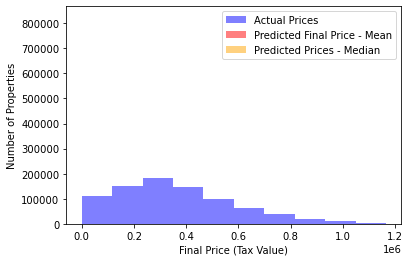

In [29]:
# plot to visualize actual vs predicted. 
plt.hist(y_train.tax_value, color='blue', alpha=.5, label="Actual Prices")
plt.hist(y_train.price_pred_mean, bins=1, color='red', alpha=.5, rwidth=100, label="Predicted Final Price - Mean")
plt.hist(y_train.price_pred_median, bins=1, color='orange', alpha=.5, rwidth=100, label="Predicted Prices - Median")
plt.xlabel("Final Price (Tax Value)")
plt.ylabel("Number of Properties")
plt.legend()
plt.show()

### LinearRegression (OLS)

1. Fit the model using X_train_scaled and the labels from y_train. 

2. Predict final grade for students in training sample using our model (lm). 

3. Evaluate using RMSE

4. Repeat predictions and evaluation for validation. 

5. Compare RMSE train vs. validation. Overfitting? 

In [30]:
y_train.head()

,tax_value,price_pred_mean,price_pred_median
278237,405574.0,363845.893041,328010.0
245132,366057.0,363845.893041,328010.0
1369940,177000.0,363845.893041,328010.0
1533627,681822.0,363845.893041,328010.0
181419,251452.0,363845.893041,328010.0


In [31]:
# create the model object
# 
# make the thing
# 
lm = LinearRegression(normalize=True)

In [32]:
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
# 
# fit the thing
# 
lm.fit(X_train, y_train.tax_value)

LinearRegression(normalize=True)

In [33]:
# predict train
# 
# use the thing!
# 
y_train['price_pred_lm'] = lm.predict(X_train)

In [34]:
# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.price_pred_lm) ** (1/2)

# predict validate
y_validate['price_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.price_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  52712.21142661735 
Validation/Out-of-Sample:  52827.96565767052


In [35]:
metric_df = metric_df.append({
    'model': 'OLS Regressor', 
    'RMSE_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.price_pred_lm)}, ignore_index=True)

In [36]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,222959.248065,0.000000
1,OLS Regressor,52827.965658,0.942413


### LassoLars

1. Fit the model using X_train_scaled and the labels from y_train. 

2. Predict final grade for students in training sample using our model (lars). 

3. Evaluate using RMSE

4. Repeat predictions and evaluation for validation. 

5. Compare RMSE train vs. validation. Overfitting? 

In [37]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series!
lars.fit(X_train, y_train.tax_value)

# predict train
y_train['price_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.price_pred_lars) ** (1/2)

# predict validate
y_validate['price_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.price_pred_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  52778.97116077421 
Validation/Out-of-Sample:  52891.84932879514


In [38]:
metric_df = make_metric_df(y_validate.tax_value,
               y_validate.price_pred_lars,
               'lasso_alpha_1',
               metric_df)

In [39]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,222959.248065,0.000000
1,OLS Regressor,52827.965658,0.942413
2,lasso_alpha_1,52891.849329,0.942273


In [40]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,222959.248065,0.000000
1,OLS Regressor,52827.965658,0.942413
2,lasso_alpha_1,52891.849329,0.942273


### Trying a higher alpha translates into a higher RMSE. Sticking with alpha = 1 for lower RMSE.

In [41]:
# create the model object
lars = LassoLars(alpha=4)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series!
lars.fit(X_train, y_train.tax_value)

# predict train
y_train['price_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.price_pred_lars) ** (1/2)

# predict validate
y_validate['price_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.price_pred_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  53446.53256349029 
Validation/Out-of-Sample:  53557.847396913756


### TweedieRegressor (GLM)

1. Fit the model using X_train_scaled and the labels from y_train. 

2. Predict final price for properties in training sample using our model (glm). 

3. Evaluate using RMSE

4. Repeat predictions and evaluation for validation. 

5. Compare RMSE train vs. validation. Overfitting? 

In [42]:
from sklearn.linear_model import TweedieRegressor

In [43]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)


# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.tax_value)

# predict train
y_train['price_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.price_pred_glm) ** (1/2)

# predict validate
y_validate['price_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.price_pred_glm) ** (1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  93319.72718086369 
Validation/Out-of-Sample:  93165.38464263831


In [44]:
make_metric_df(y_validate.tax_value,
               y_validate.price_pred_glm,
               'glm_poisson',
               metric_df)

,model,RMSE_validate,r^2_validate
0,median_baseline,222959.248065,0.000000
1,OLS Regressor,52827.965658,0.942413
2,lasso_alpha_1,52891.849329,0.942273
3,glm_poisson,93165.384643,0.820895


In [45]:
### Using a different power to try the fit to a different distribution

In [46]:
# create the model object
glm = TweedieRegressor(power=0, alpha=0)


# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.tax_value)

# predict train
y_train['price_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.price_pred_glm) ** (1/2)

# predict validate
y_validate['price_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.price_pred_glm) ** (1/2)

print("RMSE for GLM using Tweedie, power=0 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=0 & alpha=0
Training/In-Sample:  52712.211426618465 
Validation/Out-of-Sample:  52827.965697155036


### Polynomial Regression

Using sklearn.preprocessing.PolynommialFeatures() + sklearn.linear_model.LinearRegression()

1. Create the new features, based on value indicated for degree for train, validate & test. 

2. Fit the Linear Regression model

3. Predict using the transformed (squared or cubed, e.g.) features 

4. Evaluate using RMSE

5. Repeat predictions and evaluation for validation.

6. Compare RMSE train vs. validation. Overfitting?

## **PolynomialFeatures**

In [47]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 =  pf.transform(X_test)

## **LinearRegression**

In [48]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.tax_value)

# predict train
y_train['price_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.price_pred_lm2) ** (1/2)

# predict validate
y_validate['price_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.price_pred_lm2) ** 0.5

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  49614.4802098233 
Validation/Out-of-Sample:  49762.1036597909


In [49]:
metric_df = make_metric_df(y_validate.tax_value,
               y_validate.price_pred_lm2,
               'quadratic',
               metric_df)

In [50]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,222959.248065,0.000000
1,OLS Regressor,52827.965658,0.942413
2,lasso_alpha_1,52891.849329,0.942273
3,quadratic,49762.103660,0.948903


### Evaluate

**Plotting Actual vs. Predicted Values**

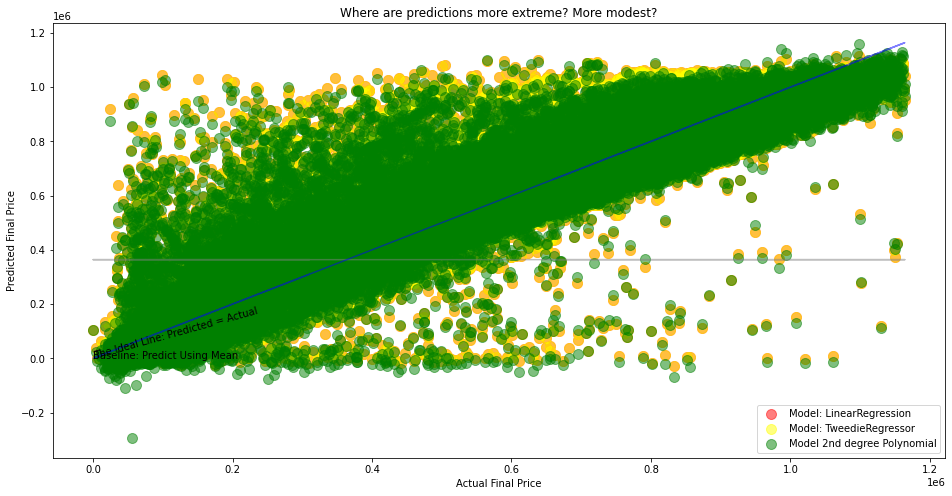

In [51]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.tax_value, y_validate.price_pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.tax_value, y_validate.tax_value, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.tax_value, y_validate.price_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tax_value, y_validate.price_pred_glm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tax_value, y_validate.price_pred_lm2, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Final Price")
plt.ylabel("Predicted Final Price")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

**Residual Plots: Plotting the Errors in Predictions**

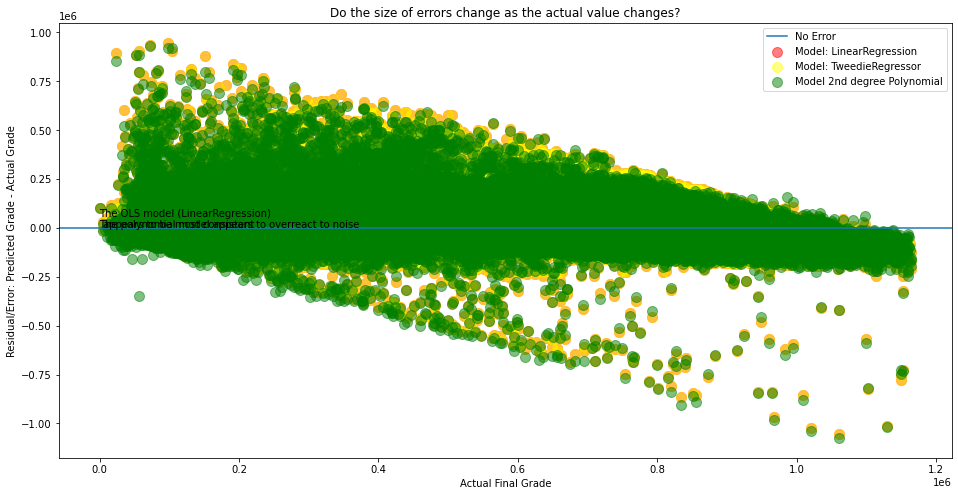

In [52]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.tax_value, y_validate.price_pred_lm - y_validate.tax_value , 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tax_value, y_validate.price_pred_glm - y_validate.tax_value, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tax_value, y_validate.price_pred_lm2 - y_validate.tax_value, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Final Grade")
plt.ylabel("Residual/Error: Predicted Grade - Actual Grade")
plt.title("Do the size of errors change as the actual value changes?")
plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

**Histograms**

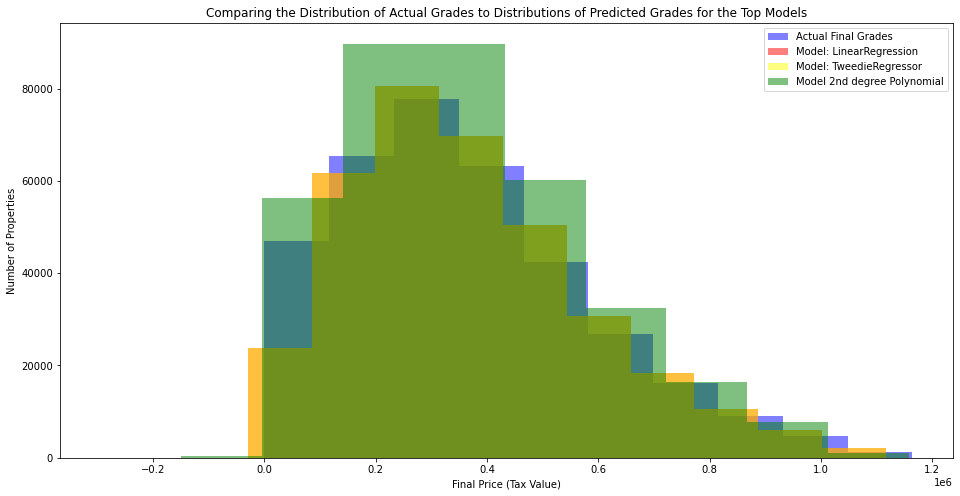

In [53]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.tax_value, color='blue', alpha=.5, label="Actual Final Prices")
plt.hist(y_validate.price_pred_lm, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.price_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.price_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("Final Price (Tax Value)")
plt.ylabel("Number of Properties")
plt.title("Comparing the Distribution of Actual Grades to Distributions of Predicted Grades for the Top Models")
plt.legend()
plt.show()

In [54]:
# addendum: Comparing models DF:

In [55]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,222959.248065,0.000000
1,OLS Regressor,52827.965658,0.942413
2,lasso_alpha_1,52891.849329,0.942273
3,quadratic,49762.103660,0.948903


**Model Selection & Out-of-Sample Evaluation**

Model selected: lm (using LinearRegression)

In [56]:
y_test = pd.DataFrame(y_test)

# predict on test
y_test['price_pred_lm'] = lm.predict(X_test)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.tax_value, y_test.price_pred_lm) ** (1/2)

print("RMSE for OLS Model using LinearRegression\nOut-of-Sample Performance: ", rmse_test)

RMSE for OLS Model using LinearRegression
Out-of-Sample Performance:  52599.31998890972


In [57]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.tax_value)

# predict train
y_train['price_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.price_pred_lm2) ** (1/2)

# predict validate
y_validate['price_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.price_pred_lm2) ** 0.5

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  49614.4802098233 
Validation/Out-of-Sample:  49762.1036597909


In [ ]:
y_test = pd.DataFrame(y_test)

# predict on test
y_test['price_pred_lm'] = lm2.predict(X_test)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.tax_value, y_test.price_pred_lm) ** (1/2)

print("RMSE for OLS Model using LinearRegression\nOut-of-Sample Performance: ", rmse_test)